In [1]:
import os

In [2]:
guns=os.listdir("/resources/CNNs/GUNS")
noguns=os.listdir("/resources/CNNs/No Guns")
filenames=guns+noguns
filenames_path=["/resources/CNNs/GUNS/"+ i for i in guns]+["/resources/CNNs/No Guns/"+ i for i in noguns]

In [3]:
len(filenames)

59

In [4]:
gun = [1 for i in guns]
nogun= [0 for i in noguns]


In [5]:
len(gun)

29

In [6]:
len(nogun)

30

In [7]:
categories=gun+nogun
len(categories)

59

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame({
    'filename': filenames,
    'filename_path': filenames_path,
    'category': categories
})

In [10]:
df.head()

,filename,filename_path,category
0,armas (68).jpg,/resources/CNNs/GUNS/armas (68).jpg,1
1,armas (36).jpg,/resources/CNNs/GUNS/armas (36).jpg,1
2,armas (41).jpg,/resources/CNNs/GUNS/armas (41).jpg,1
3,armas (47).jpg,/resources/CNNs/GUNS/armas (47).jpg,1
4,armas (85).jpg,/resources/CNNs/GUNS/armas (85).jpg,1


In [11]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [12]:
from keras.preprocessing import image
img=image.load_img(filenames_path[0], target_size=(128,128,3),grayscale=False)
img = image.img_to_array(img)

In [13]:
'/resources/CNNs/No Guns/.ipynb_checkpoints',

('/resources/CNNs/No Guns/.ipynb_checkpoints',)

In [14]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in filenames_path:

    img = image.load_img(i, target_size=(128,128,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)


In [15]:
import numpy as np
X = np.array(train_image)

In [16]:
X.shape

(59, 128, 128, 3)

In [17]:
y=np.array(df['category'])
y.shape

(59,)

In [18]:
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)

Total number of outputs :  2


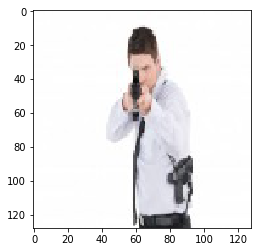

In [19]:
plt.imshow(X[0,:,:], cmap='gray')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [21]:
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
__________

In [23]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 47 samples, validate on 12 samples
Epoch 1/10
47/47 [==============================] - 2s 34ms/step - loss: 0.8995 - acc: 0.4894 - val_loss: 0.8099 - val_acc: 0.5000
Epoch 2/10
47/47 [==============================] - 1s 25ms/step - loss: 0.7181 - acc: 0.5745 - val_loss: 0.6734 - val_acc: 0.5833
Epoch 3/10
47/47 [==============================] - 1s 24ms/step - loss: 0.6837 - acc: 0.4894 - val_loss: 0.7347 - val_acc: 0.5000
Epoch 4/10
47/47 [==============================] - 1s 27ms/step - loss: 0.6047 - acc: 0.6809 - val_loss: 0.7455 - val_acc: 0.4167
Epoch 5/10
47/47 [==============================] - 1s 26ms/step - loss: 0.4865 - acc: 0.7234 - val_loss: 0.6569 - val_acc: 0.6667
Epoch 6/10
47/47 [==============================] - 1s 27ms/step - loss: 0.4268 - acc: 0.8511 - val_loss: 0.9072 - val_acc: 0.4167
Epoch 7/10
47/47 [==============================] - 1s 25ms/step - loss: 0.9039 - acc: 0.6170 - val_loss: 0.7001 - val_acc: 0.5000
Epoch 8/10
47/47 [=====================

In [24]:
y_pred=model.predict(X_test)

In [25]:
predicted_val = [int(round(p[0])) for p in y_pred]

In [26]:
predicted_val

[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]

In [27]:
y_test

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [30]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


These are just a few of the options available (for more, see the documentation). Let's quickly go over what we just wrote:

    rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
    width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
    rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
    shear_range is for randomly applying shearing transformations
    zoom_range is for randomly zooming inside pictures
    horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
    fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


In [32]:
img = load_img(filenames_path[0])  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

In [42]:
x.shape

(1, 113, 168, 3)

In [32]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='NEW', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

In [40]:

# # this is the augmentation configuration we will use for training
# train_datagen = ImageDataGenerator(
#     rescale=1. / 255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

# # this is the augmentation configuration we will use for testing:
# # only rescaling
# test_datagen = ImageDataGenerator(rescale=1. / 255)

In [50]:
X_train[1].shape

(128, 128, 3)

In [51]:
X_train.shape

(35, 128, 128, 3)

In [52]:
# for i in X_train:
#     i = i.reshape((1,) + i.shape)  
#     for batch in datagen.flow(i, batch_size=1,
#                           save_to_dir='NEW', save_prefix='cat', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely



In [38]:
# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir='NEW', save_prefix='cat', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

In [ ]:
# # this is the augmentation configuration we will use for testing:
# # only rescaling
# test_datagen = ImageDataGenerator(rescale=1. / 255)



In [ ]:
# validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='binary')

# model.fit_generator(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=nb_validation_samples // batch_size)

# model.save_weights('first_try.h5')